In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler



In [ ]:

# File path for CSV
file_path = '/content/drive/My Drive/COVID-19_.csv'
df = pd.read_csv(file_path)




In [ ]:
# Step 2: Data Inspection
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

In [ ]:

# Dimensions of the data
print("\nData Dimensions:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types of each column
print("\nData Types:")
print(df.dtypes)

# Identify missing data
print("\nMissing Data Count:")
print(df.isnull().sum())

In [ ]:
#  number of rows
num_rows = df.shape[0]
print(f"The DataFrame has {num_rows} rows.")


In [ ]:
# Identify missing values and duplicate rows
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


In [ ]:
# Step 3: Data Cleaning
# Drop duplicate rows
data = df.drop_duplicates()

# Drop missing values for key columns
threshold = 0.5 * len(data)
cleaned_data = df.dropna(axis=1, thresh=threshold)

# Fill remaining missing values
cleaned_data = cleaned_data.fillna(cleaned_data.median(numeric_only=True))

print("\nCleaned Dataset Info:")
print(cleaned_data.info())

In [ ]:
# Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Handle missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

print("\nMissing Values Handled Successfully!")
print(df.isnull().sum())


In [ ]:
# Step 4: Descriptive Statistics
summary_stats = cleaned_data.describe()
print("\nSummary Statistics:")
print(summary_stats)


In [ ]:
# Step 5: Data Visualization
# Histograms
numerical_cols = cleaned_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols[:2]:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {col}")
    plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_data['staffed_icu_pediatric_patients_confirmed_covid'], kde=True, bins=30, color='blue')
plt.title("Histogram of Pediatric ICU Patients with Confirmed COVID")
plt.xlabel("Number of Patients")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Boxplot for ICU bed utilization
time_col = "date"
if "staffed_icu_adult_patients_confirmed_covid" in cleaned_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=cleaned_data, x="state", y="staffed_icu_adult_patients_confirmed_covid")
    plt.xticks(rotation=90)
    plt.title("ICU Adult Patients by State")
    plt.show()

In [ ]:
# Key numeric columns to analyze
key_numeric_cols =['inpatient_beds_used_covid_coverage', 'inpatient_beds', 'hospital_onset_covid' , 'previous_day_admission_adult_covid_suspected_coverage']

# Select specific
numeric_data = cleaned_data[key_numeric_cols]

# Compute correlation matrix
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap (Key Features)")
plt.show()


In [ ]:

# Scatter plot for hospital_onset_covid vs critical_staffing_shortage_today_yes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x="hospital_onset_covid", y="critical_staffing_shortage_today_yes")
plt.title("Hospital Onset COVID vs Critical Staffing Shortage (Yes)")
plt.xlabel("Hospital Onset COVID")
plt.ylabel("Critical Staffing Shortage (Yes)")
plt.show()


In [ ]:
#3D Plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x, y, z axes
ax.scatter(cleaned_data['hospital_onset_covid'],
           cleaned_data['critical_staffing_shortage_today_yes'],
           cleaned_data['staffed_icu_pediatric_patients_confirmed_covid'],
           c='b', marker='o')

# Labels for the axes
ax.set_xlabel('Hospital Onset COVID')
ax.set_ylabel('Critical Staffing Shortage (Yes)')
ax.set_zlabel('ICU Pediatric Patients Confirmed COVID')

# Title
ax.set_title('3D Scatter Plot: Hospital Onset COVID vs Staffing Shortage vs ICU Pediatric Patients')

plt.show()


Mean Squared Error: 2077.290065454068
R-squared: 0.030634356738450275


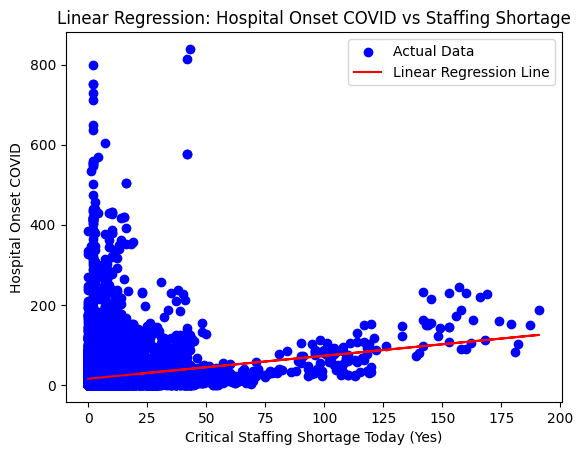

In [ ]:
# Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = cleaned_data[['critical_staffing_shortage_today_yes']]
y = cleaned_data['hospital_onset_covid']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')
plt.title('Linear Regression: Hospital Onset COVID vs Staffing Shortage')
plt.xlabel('Critical Staffing Shortage Today (Yes)')
plt.ylabel('Hospital Onset COVID')
plt.legend()
plt.show()


PCA Component Loadings (Feature Contributions):
   critical_staffing_shortage_today_yes  hospital_onset_covid  \
0                              0.373138              0.318719   
1                             -0.441778              0.511281   

   total_staffed_pediatric_icu_beds  \
0                          0.583482   
1                         -0.186132   

   staffed_icu_pediatric_patients_confirmed_covid  \
0                                        0.273557   
1                                        0.699805   

   staffed_pediatric_icu_bed_occupancy  
0                             0.586431  
1                            -0.138027  

Top Features Contributing to PC1:
staffed_pediatric_icu_bed_occupancy               0.586431
total_staffed_pediatric_icu_beds                  0.583482
critical_staffing_shortage_today_yes              0.373138
hospital_onset_covid                              0.318719
staffed_icu_pediatric_patients_confirmed_covid    0.273557
Name: 0, dtype: float64



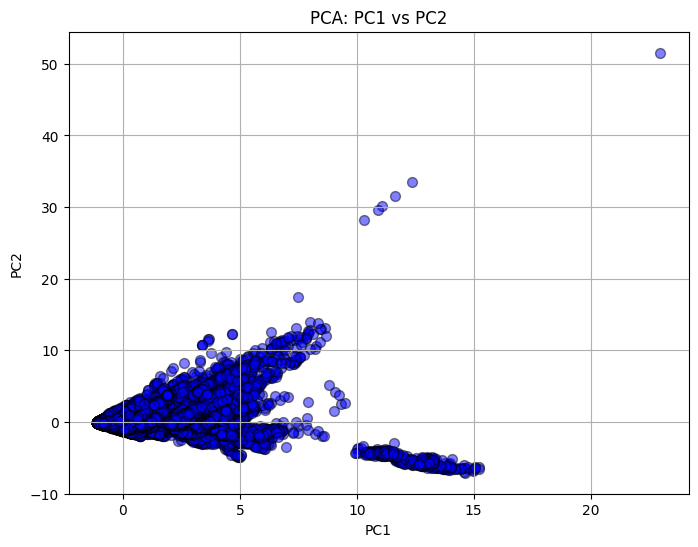

In [ ]:
#PCA Analysis

numeric_columns = [
    'critical_staffing_shortage_today_yes',
    'hospital_onset_covid',
    'total_staffed_pediatric_icu_beds',
    'staffed_icu_pediatric_patients_confirmed_covid',
    'staffed_pediatric_icu_bed_occupancy'
]

# Standardize the data
scaled_data = StandardScaler().fit_transform(cleaned_data[numeric_columns])

# PCA Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])


pca_components = pd.DataFrame(pca.components_, columns=numeric_columns)

# Display
print("PCA Component Loadings (Feature Contributions):")
print(pca_components)

# Sort for pc1 and pc2
pc1_contributions = pca_components.iloc[0].sort_values(ascending=False)
pc2_contributions = pca_components.iloc[1].sort_values(ascending=False)


print("\nTop Features Contributing to PC1:")
print(pc1_contributions.head())

print("\nTop Features Contributing to PC2:")
print(pc2_contributions.head())

# Scatter plot for PCA result (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='blue', edgecolors='k', s=50)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [ ]:
# Percentage of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the results
print(f"Percentage of variance explained by PC1: {explained_variance[0] * 100:.2f}%")
print(f"Percentage of variance explained by PC2: {explained_variance[1] * 100:.2f}%")
